In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from weib_surv_gbm.model import GBMSurvivalParamModel

# Example

In [2]:
np.random.seed(42)

n_samples = 10000
n_features = 5

features = np.random.rand(n_samples, n_features)

lambda_1 = 1
lambda_2 = 10

x1_pos = np.floor((np.sin(features[:, 0] * np.pi - np.pi/2) + np.pi/2) / np.pi * 3).astype(int)
x2_pos = np.floor((np.sin(features[:, 3] * np.pi - np.pi/2) + np.pi/2) / np.pi * 3).astype(int)

x1_pos = np.clip(x1_pos, 0, 2)
x2_pos = np.clip(x2_pos, 0, 2)

pattern = (x1_pos + x2_pos) % 2
lambda_val = np.where(pattern == 0, lambda_1, lambda_2) / 100

coefficients = np.array([10, 0.1, 1.e-7, -0.15, 1.e-7])
v = 5
U = np.random.uniform(0, 1, n_samples)

time = (-np.log(U) / (lambda_val)) ** (1/v) 

delta = np.random.choice([0, 1], size=n_samples, p=[0.2, 0.8])

In [3]:
target = np.zeros((2, len(time)))
target[1] = time

target[0] = delta
target = target.transpose()

target = np.array(list(map(tuple, target)), dtype=[('delta', '?'), ('time', 'f8')])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
model = GBMSurvivalParamModel()

model.fit(X_train, y_train)

[0]	d_train-SurvivalLoss:8.86052
[1]	d_train-SurvivalLoss:8.84232
[2]	d_train-SurvivalLoss:8.82344
[3]	d_train-SurvivalLoss:8.80372
[4]	d_train-SurvivalLoss:8.78309
[5]	d_train-SurvivalLoss:8.76129
[6]	d_train-SurvivalLoss:8.73838
[7]	d_train-SurvivalLoss:8.71431
[8]	d_train-SurvivalLoss:8.68893
[9]	d_train-SurvivalLoss:8.66239
[10]	d_train-SurvivalLoss:8.63465
[11]	d_train-SurvivalLoss:8.60577
[12]	d_train-SurvivalLoss:8.57586
[13]	d_train-SurvivalLoss:8.54499
[14]	d_train-SurvivalLoss:8.51301
[15]	d_train-SurvivalLoss:8.48020
[16]	d_train-SurvivalLoss:8.44645
[17]	d_train-SurvivalLoss:8.41205
[18]	d_train-SurvivalLoss:8.37693
[19]	d_train-SurvivalLoss:8.34120
[20]	d_train-SurvivalLoss:8.30500
[21]	d_train-SurvivalLoss:8.26837
[22]	d_train-SurvivalLoss:8.23141
[23]	d_train-SurvivalLoss:8.19430
[24]	d_train-SurvivalLoss:8.15723
[25]	d_train-SurvivalLoss:8.12013
[26]	d_train-SurvivalLoss:8.08318
[27]	d_train-SurvivalLoss:8.04663
[28]	d_train-SurvivalLoss:8.01045
[29]	d_train-SurvivalLos

In [6]:
predicted_proba = model.predict(X_test)

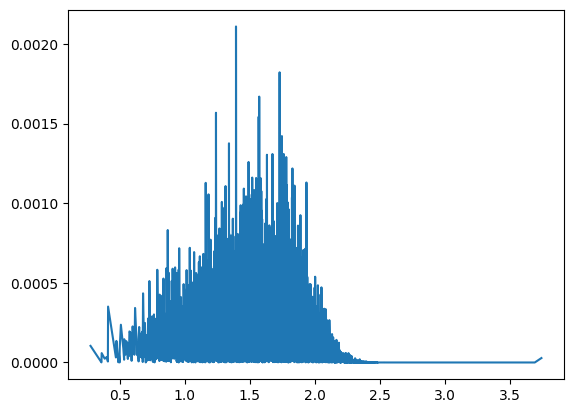

In [7]:
plt.plot(model._times, predicted_proba[2])

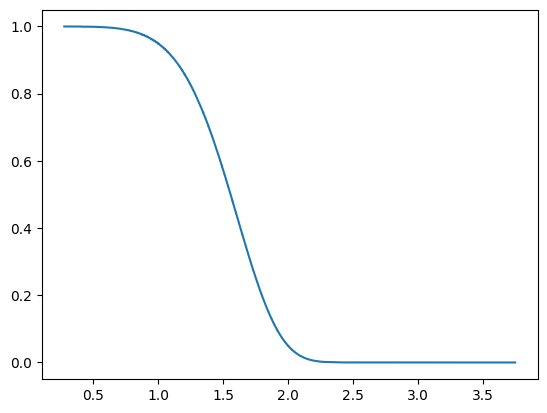

In [8]:
cumulative_proba = np.cumsum(predicted_proba, axis=1)

survival_function = 1 - cumulative_proba

plt.plot(model._times, survival_function[2])

In [9]:
model.score(X_test, y_test)

np.float64(0.6959735067494384)

In [10]:
model.get_params()

{'learning_rate': 0.1,
 'n_estimators': 100,
 'max_depth': 7,
 'random_seed': 42,
 'lambda_val': 1,
 'alpha': 0,
 'colsample_bytree': 1,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'max_leaves': 0,
 'max_bin': 256,
 'min_child_weight': 1,
 'subsample': 1,
 'initial_lambda_by_mean': False,
 'initial_k': None}